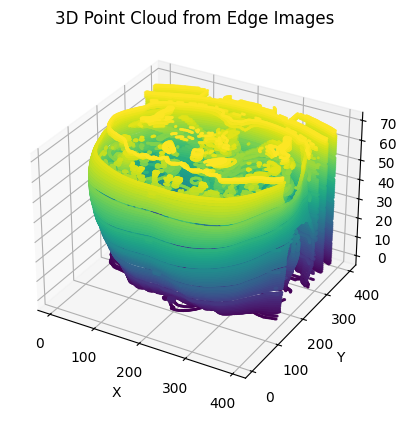

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_images_from_folder(folder):
    """Load all edge images from a folder."""
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            images.append(np.array(img))
    return images

def create_pointcloud_from_images(images):
    """Convert stacked edge images into a 3D point cloud."""
    pointcloud = []
    
    for z, img in enumerate(images):
        # Find coordinates of edge pixels
        y, x = np.where(img > 0)  # Non-zero pixels (edges)
        z_values = np.full_like(x, z)  # Z-coordinate is the image index
        
        # Combine the coordinates into 3D points
        points = np.column_stack((x, y, z_values))
        pointcloud.append(points)
    
    # Stack all 2D point clouds to form the final 3D point cloud
    pointcloud = np.vstack(pointcloud)
    return pointcloud

def visualize_pointcloud(pointcloud):
    """Visualize the 3D point cloud."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(pointcloud[:, 0], pointcloud[:, 1], pointcloud[:, 2], c=pointcloud[:, 2], cmap='viridis', s=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("3D Point Cloud from Edge Images")
    
    plt.show()

# Example usage
folder_path = 'res/Images-Patient-000302-01/3'  # Change this to your folder with edge images
images = load_images_from_folder(folder_path)
pointcloud = create_pointcloud_from_images(images)
visualize_pointcloud(pointcloud)
